# Diabetes

# STEP 1 - Choose Model

Mencari Algoritma yang cocok untuk problem yang akan di selesaikan

In [1]:
# lib standart
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk split data
from sklearn.model_selection import train_test_split

# Untuk Algoritma ML yang akan di pakai
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# untuk impute nilai kosong
from sklearn.impute import SimpleImputer

# untuk scale data
from sklearn.preprocessing import StandardScaler

# untuk one hot data kategori
from sklearn.preprocessing import OneHotEncoder

# untuk pca
from sklearn.decomposition import PCA

# untuk membangun pipeline ML
from sklearn.pipeline import Pipeline

# bagian dari pipe line untuk handling kolom 
from sklearn.compose import ColumnTransformer

# menghitung nilai f1
from sklearn.metrics import f1_score

# menyimpan model
import pickle

https://towardsdatascience.com/workflow-of-a-machine-learning-project-ec1dba419b94

In [2]:
df = pd.read_csv("diabetes.csv")
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data = data.replace(0, np.nan)

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [10]:
data['Outcome'] = data['Outcome'].fillna(0)

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [12]:
data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
data.shape

(768, 9)

In [14]:
data.isnull().sum()/data.shape[0]

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

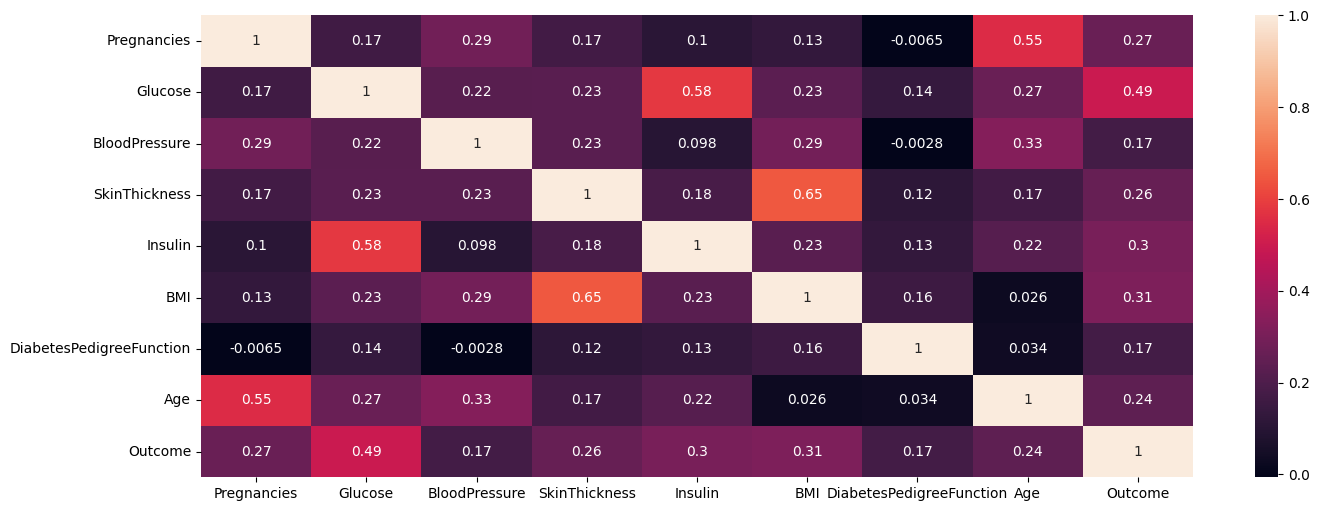

In [15]:
plt.figure(figsize=(16,6))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


# Train-Test split

In [18]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

# Featuring Engginering dan Pipeline

In [20]:
# numerical_pipeline

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'mean')),
        ('scaler', StandardScaler()),
    ])

In [21]:
# categorical_pipeline

categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder())
    ])

In [23]:
# preprocessor

list_numeric = ['Pregnancies', 
                'Glucose', 
                'BloodPressure', 
                'SkinThickness', 
                'Insulin', 
                'BMI', 
                'DiabetesPedigreeFunction', 
                'Age']



preprocessor = ColumnTransformer([
        ('numeric', numerical_pipeline, list_numeric)
    ])

# Trainning

# Logistic Classifier

In [24]:
model_logistic = Pipeline([
        ('preprocessor', preprocessor),
        ('algoritma', LogisticRegression(solver='lbfgs', max_iter=400))
    ])

In [25]:
model_logistic.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('algoritma', LogisticRegression(max_iter=400))])

In [26]:
filename = 'model_logistic.sav'
pickle.dump(model_logistic, open(filename, 'wb'))

# SVM Classifier

In [27]:
model_SVC = Pipeline([
        ('preprocessor', preprocessor),
        ('algoritma', SVC(kernel = 'linear'))
    ])

In [28]:
model_SVC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('algoritma', SVC(kernel='linear'))])

In [29]:
filename = 'model_SVC.sav'
pickle.dump(model_SVC, open(filename, 'wb'))

# Random Forest

In [30]:
model_RandomForest = Pipeline([
        ('preprocessor', preprocessor),
        ('algoritma', RandomForestClassifier(max_features = 'sqrt') )
    ])

In [31]:
model_RandomForest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('algoritma', RandomForestClassifier())])

In [32]:
filename = 'model_RandomForest.sav'
pickle.dump(model_RandomForest, open(filename, 'wb'))

# Matrix Confusion

In [33]:
y_pred_logistic = model_logistic.predict(X_test)
y_pred_svm      = model_SVC.predict(X_test)
y_pred_rm       = model_RandomForest.predict(X_test)

df_pred = pd.DataFrame()
df_pred['y_test'] = y_test
df_pred['y_pred_logistic'] = y_pred_logistic
df_pred['y_pred_svm'] = y_pred_svm
df_pred['y_pred_rm'] = y_pred_rm

In [34]:
f1_score_logistic = f1_score(y_test, y_pred_logistic)
f1_score_svm = f1_score(y_test, y_pred_svm)
f1_score_rm = f1_score(y_test, y_pred_rm)

In [35]:
print('f1_score_Logistic : ' + str(f1_score_logistic) ) 
print('f1_score_SVM : ' + str(f1_score_svm) )
print('f1_score_RM : ' + str(f1_score_rm) )

f1_score_logistic : 0.7070707070707072
f1_score_svm : 0.7070707070707072
f1_score_rm : 0.6601941747572816


# ROC and AUC

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

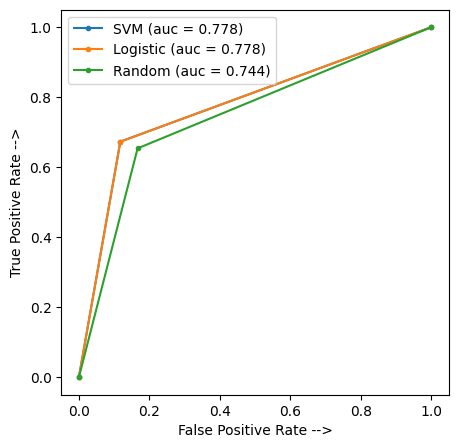

In [36]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(5, 5), dpi=100)

# SVM
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_svm)

# Logistic
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

# Random
random_fpr, random_tpr, threshold = roc_curve(y_test, y_pred_rm)
auc_random = auc(random_fpr, random_tpr)

plt.plot(random_fpr, random_tpr, marker='.', label='Random (auc = %0.3f)' % auc_random)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

Dari Percobaan di atas di ketahui model terbaik adalah SVM, maka model SVM ini bisa di kembangkan lebih lanjut